# Pairplot with GMM: Visualizing High Dimensional Data and Clustering

This example provides how to visualize high dimensional data using the pairplot_with_gmm function. This function is specifcally useful because if we would like to cluster or learn about the geometry of high dimensional data, then we can call this function and utilize its ability to do pairwise comparisons across every dimension of that data as well as GMM clustering with ellipses plotted from the GMM covarariances. 

In [1]:
import graspologic

import numpy as np
import seaborn as sns
%matplotlib inline

/opt/hostedtoolcache/Python/3.8.7/x64/lib/python3.8/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


## Simulate a binary graph using stochastic block model
The 3-block model is defined as below in the next cell. 

Thus, the first 50 vertices belong to block 1, the second 50 vertices belong to block 2, and the last 50 vertices belong to block 3.

In [2]:
from graspologic.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05], 
     [0.1, 0.4, 0.15], 
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)

## Embed using adjacency spectral embedding to obtain lower dimensional representation of the graph

The embedding dimension is automatically chosen. It should embed to 3 dimensions.

In [3]:
from graspologic.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

print(X.shape)

(150, 3)


## Use pairplot_with_gmm to plot the embedded data with ellipses

First we generate labels that correspond to blocks. We pass the labels along with the data for to create a pairplot with the ellipses estimated by the GMM over each compnonent of the data.

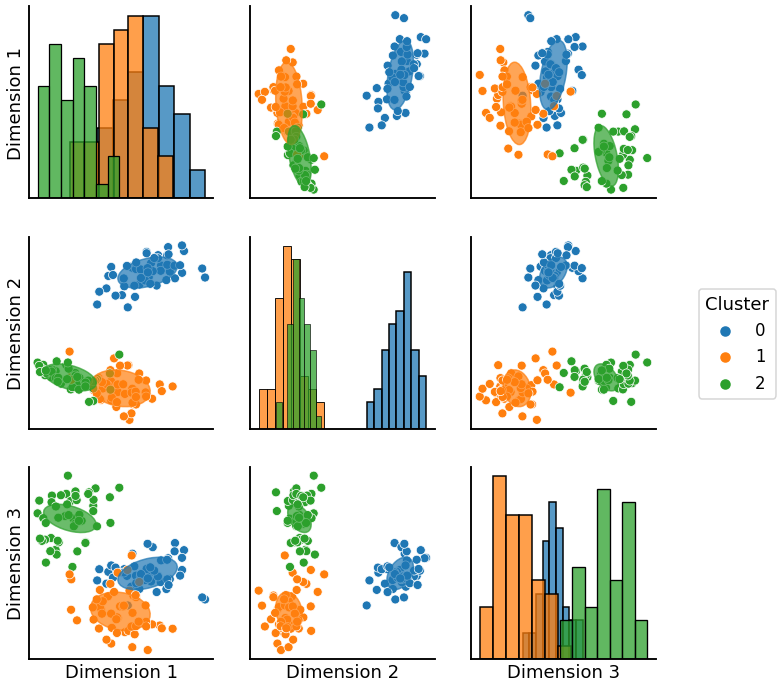

In [4]:
import warnings
warnings.filterwarnings('ignore')

from graspologic.plot import pairplot_with_gmm
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
graph = pairplot_with_gmm(X, gmm, labels = None, cluster_palette = None,  label_palette = None)

If you want to label your ellipses a specific color you can do the following. Please note that since we are assigning cluster assignment numbers (in this case 0, 1, 2) that the following plot will not necessarily have cluster colors matching those of the underlying scatter points. This is due to the fact that GMM does not label clusters in any particular order hence causing a permutations of colors. 

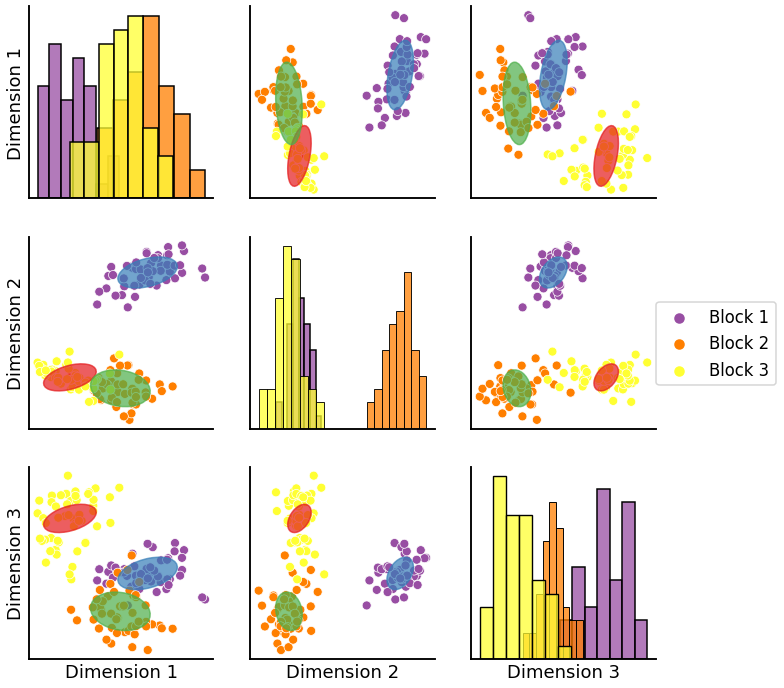

In [5]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
#we need 2*n_components to get two differnt colors for labels and clusters but from same palette
color = sns.color_palette("Set1", 2*3)
cluster_palette = {0: color[0], 1:color[1], 2: color[2]}
label_palette = {"Block 1": color[3], 'Block 2':color[4], 'Block 3': color[5]}
graph = pairplot_with_gmm(X, gmm, labels = labels, cluster_palette = cluster_palette,  label_palette = label_palette)